In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pickle as pk
import scipy.sparse as spa
import scipy.sparse.linalg as spalin
from tqdm import trange
import matplotlib.colors as mcolors
from matplotlib.ticker import MaxNLocator
import imageio
import sys
sys.path.append("..")
from spatial_ultis import *
sys.path.append("../dyn/")
from dyn_ultis import *

In [22]:
def generate_params_phase_try(trial1:int, trial2:int):
    trail_num = 20

    rescale = 160
    N_E, N_I = 22500, 5625
    alpha = 0.5
    d_EE, d_IE, d_EI, d_II = 0.05, 0.05, 0.05, 0.07
    conn_NEE, conn_NIE, conn_NEI, conn_NII = tuple(alpha * np.array([2*np.pi * N_E * d_EE **2, 2*np.pi * N_I * d_IE **2, 2*np.pi * N_E * d_EI **2,2*np.pi * N_I * d_II **2]))
    g_bar_EE, g_bar_IE, g_bar_EI, g_bar_II = 5.0, 2.81, -11.25, -4.38
    g_EE, g_EI, g_IE, g_II = 0.1, 0.1, 0.1, 0.1

    d_II_list = np.linspace(0.06,0.07,trail_num)
    d_II = d_II_list[trial1]

    g_bar_EE_list = list(np.linspace(5.0, 7.5, trail_num))
    g_bar_EE = g_bar_EE_list[trial2]

    
    p_net = Network_Params(N_E = N_E, N_I = N_I,
        N_EE = conn_NEE, N_IE = conn_NIE, N_EI = conn_NEI, N_II = conn_NII,
        d_EE = d_EE, d_IE = d_IE, d_EI = d_EI, d_II = d_II,
        g_bar_EE = g_bar_EE, g_bar_EI = g_bar_EI, g_bar_IE = g_bar_IE, g_bar_II = g_bar_II,
        g_EE = g_EE, g_EI = g_EI, g_IE = g_IE, g_II = g_II
        )
    return p_net   

In [37]:
#记得把d调整成0.1然后画总共三个图
def generate_params_phase_try(trial1:int, trial2:int):
    trial_num = 20

    rescale = 160
    N_E, N_I = 22500, 5625
    alpha = 0.5
    d_EE, d_IE, d_EI, d_II = 0.05, 0.05, 0.05, 0.05
    conn_NEE, conn_NIE, conn_NEI, conn_NII = tuple(alpha * np.array([2*np.pi * N_E * d_EE **2, 2*np.pi * N_I * d_IE **2, 2*np.pi * N_E * d_EI **2,2*np.pi * N_I * d_II **2]))
    g_EE, g_EI, g_IE, g_II = 0.1, 0.1, 0.1, 0.1
    
    g_E_list = np.linspace(0,20,trial_num)
    g_I_list = np.linspace(0,-10,trial_num)
    g_E, g_I = g_E_list[trial1], g_I_list[trial2]


    p_net = Network_Params(N_E = N_E, N_I = N_I,
        N_EE = conn_NEE, N_IE = conn_NIE, N_EI = conn_NEI, N_II = conn_NII,
        d_EE = d_EE, d_IE = d_IE, d_EI = d_EI, d_II = d_II,
        g_bar_EE = g_E, g_bar_EI = g_E, g_bar_IE = g_I, g_bar_II = g_I,
        g_EE = g_EE, g_EI = g_EI, g_IE = g_IE, g_II = g_II
        )
    return p_net   

In [95]:
#然后这个参数是要画J_IE和d_II的
def generate_params_phase_try(trial1:int, trial2:int):
    trial_num = 20

    N_E, N_I = 22500, 5625
    alpha = 0.8
    g_bar_EE, g_bar_IE, g_bar_EI, g_bar_II = 5.5, 9, -9, -4.25
    d_EE, d_IE, d_EI, d_II = 0.1, 0.1, 0.1, 0.16
    conn_NEE, conn_NIE, conn_NEI, conn_NII = tuple(alpha * np.array([2*np.pi * N_E * d_EE **2, 2*np.pi * N_I * d_IE **2, 2*np.pi * N_E * d_EI **2,2*np.pi * N_I * d_II **2]))
    g_EE, g_EI, g_IE, g_II = 0.1,0.1,0.1,0.1

    d_II_list = np.linspace(0.01,0.10,trial_num)*2
    d_II = d_II_list[trial1]
    conn_NEE, conn_NIE, conn_NEI, conn_NII = tuple(alpha * np.array([2*np.pi * N_E * d_EE **2, 2*np.pi * N_I * d_IE **2, 2*np.pi * N_E * d_EI **2,2*np.pi * N_I * d_II **2]))
    

    g_bar_IE_list = list(np.linspace(0,9,trial_num))
    g_bar_IE, g_bar_EI = g_bar_IE_list[trial2], -g_bar_IE_list[trial2]


    p_net = Network_Params(N_E = N_E, N_I = N_I,
        N_EE = conn_NEE, N_IE = conn_NIE, N_EI = conn_NEI, N_II = conn_NII,
        d_EE = d_EE, d_IE = d_IE, d_EI = d_EI, d_II = d_II,
        g_bar_EE = g_bar_EE, g_bar_EI = g_bar_EI, g_bar_IE = g_bar_IE, g_bar_II = g_bar_II,
        g_EE = g_EE, g_EI = g_EI, g_IE = g_IE, g_II = g_II
        )
    return p_net 


In [98]:
#少神经元，用于测试
def generate_params_phase_try(trial1:int, trial2:int):
    trail_num = 20

    rescale = 160
    N_E, N_I = 4900, 1225
    alpha = 0.5
    d_EE, d_IE, d_EI, d_II = 0.1, 0.1, 0.1, 0.14
    conn_NEE, conn_NIE, conn_NEI, conn_NII = tuple(alpha * np.array([2*np.pi * N_E * d_EE **2, 2*np.pi * N_I * d_IE **2, 2*np.pi * N_E * d_EI **2,2*np.pi * N_I * d_II **2]))
    g_bar_EE, g_bar_IE, g_bar_EI, g_bar_II = 5.0, 2.81, -11.25, -4.38
    g_EE, g_EI, g_IE, g_II = 0.1, 0.1, 0.1, 0.1

    d_II_list = np.linspace(0.06,0.07,trail_num)*2
    d_II = d_II_list[trial1]

    g_bar_EE_list = list(np.linspace(5.0, 7.5, trail_num))
    g_bar_EE = g_bar_EE_list[trial2]

    
    p_net = Network_Params(N_E = N_E, N_I = N_I,
        N_EE = conn_NEE, N_IE = conn_NIE, N_EI = conn_NEI, N_II = conn_NII,
        d_EE = d_EE, d_IE = d_IE, d_EI = d_EI, d_II = d_II,
        g_bar_EE = g_bar_EE, g_bar_EI = g_bar_EI, g_bar_IE = g_bar_IE, g_bar_II = g_bar_II,
        g_EE = g_EE, g_EI = g_EI, g_IE = g_IE, g_II = g_II
        )
    return p_net  

100%|██████████| 20/20 [00:36<00:00,  1.83s/it]


Text(0.5, 0, '$\\bar{g}_{EE}$')

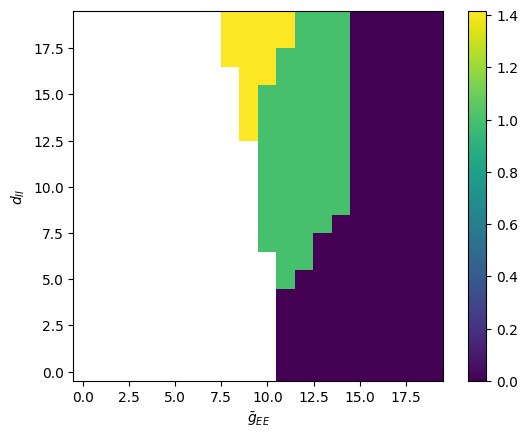

In [99]:
trail_num = 20

phase_diagram = np.full((trail_num, trail_num), np.nan)
wavenum_diagram = np.zeros((trail_num, trail_num))
freq_diagram = np.zeros((trail_num, trail_num))
for trail1 in trange(trail_num):
    for trail2 in range(trail_num):
        p_net = generate_params_phase_try(trail1, trail2)
        radius = calc_pred_radius(p_net, dim=2)
        lambda_list_pred_select,label_list_pred_select = calc_pred_outliers(p_net, dim=2)
        real_part_pred_select = np.real(lambda_list_pred_select)
        imag_part_pred_select = np.imag(lambda_list_pred_select)
        if radius >= 1:
            phase_diagram[trail1, trail2] = 0.5
        elif len(lambda_list_pred_select) != 0:
            max_real_index = np.argmax(real_part_pred_select)
            wavenum = label_list_pred_select[max_real_index]
            wavenum_diagram[trail1, trail2] = np.sqrt(wavenum[1]**2 + wavenum[2]**2)
            freq_diagram[trail1, trail2] = np.abs(imag_part_pred_select[max_real_index])/(2*np.pi)
            if (real_part_pred_select[max_real_index] < 1):
                phase_diagram[trail1, trail2] = 1
        else:
            phase_diagram[trail1, trail2] = 1

                
plt.imshow(wavenum_diagram, origin='lower')
plt.colorbar()
norm = mcolors.Normalize(vmin=0, vmax=1)
plt.imshow(phase_diagram, cmap='gray', norm=norm, origin='lower')

plt.ylabel(r'$d_{II}$')
plt.xlabel(r'$\bar{g}_{EE}$')

        

Text(0.5, 0, '$\\bar{g}_{EE}$')

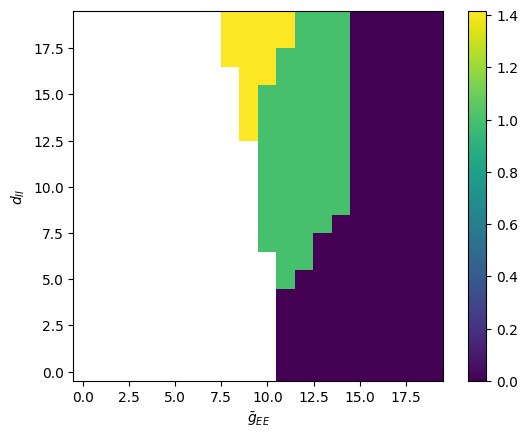

In [100]:
plt.imshow(wavenum_diagram, origin='lower')
plt.colorbar()
norm = mcolors.Normalize(vmin=0, vmax=1)
plt.imshow(phase_diagram, cmap='gray', norm=norm, origin='lower')

plt.ylabel(r'$d_{II}$')
plt.xlabel(r'$\bar{g}_{EE}$')

Text(0.5, 0, '$\\bar{g}_{EE}$')

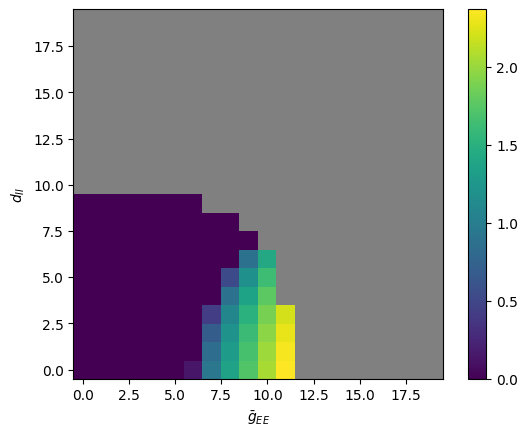

In [57]:
plt.imshow(freq_diagram, origin='lower')
plt.colorbar()
norm = mcolors.Normalize(vmin=0, vmax=1)
plt.imshow(phase_diagram, cmap='gray', norm=norm, origin='lower')

plt.ylabel(r'$d_{II}$')
plt.xlabel(r'$\bar{g}_{EE}$')

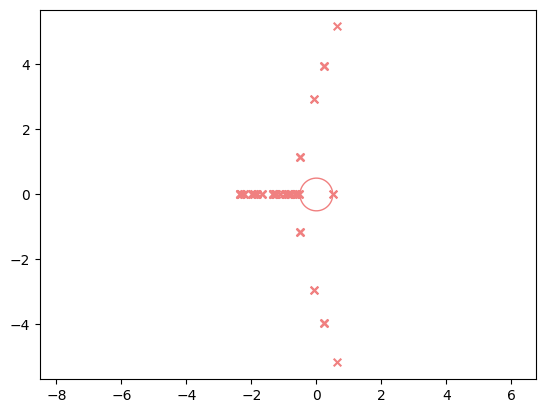

In [92]:
p_net = generate_params_phase_try(3,15)
temp_plot_pred(p_net, dim=2)

100%|██████████| 20/20 [00:18<00:00,  1.09it/s]


Text(0.5, 0, '$\\bar{g}_{EE}$')

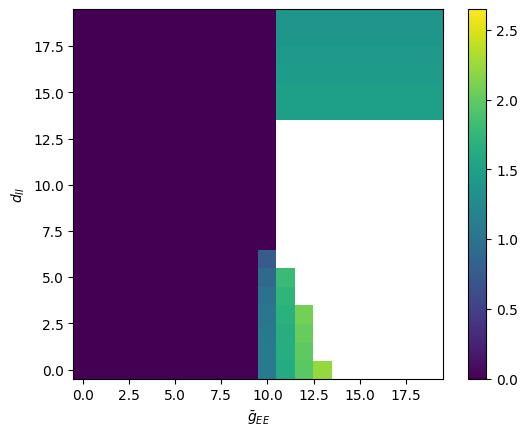

In [96]:
trail_num = 20

phase_diagram = np.full((trail_num, trail_num), np.nan)
wavenum_diagram = np.zeros((trail_num, trail_num))
freq_diagram = np.zeros((trail_num, trail_num))
for trail1 in trange(trail_num):
    for trail2 in range(trail_num):
        p_net = generate_params_phase_try(trail1, trail2)
        radius = calc_pred_radius(p_net, dim=2)
        if radius >= 1:
            phase_diagram[trail1, trail2] = 0.5
        else:
            max_lambda, wavenum = calc_max_theoried_lambda(p_net, dim=2)
            wavenum_diagram[trail1, trail2] = np.sqrt(wavenum[1]**2 + wavenum[2]**2)
            freq_diagram[trail1, trail2] = np.abs(np.imag(max_lambda))/(2*np.pi)
            if (np.real(max_lambda) < 1):
                phase_diagram[trail1, trail2] = 1


                
plt.imshow(wavenum_diagram, origin='lower')
plt.colorbar()
norm = mcolors.Normalize(vmin=0, vmax=1)
plt.imshow(phase_diagram, cmap='gray', norm=norm, origin='lower')

plt.ylabel(r'$d_{II}$')
plt.xlabel(r'$\bar{g}_{EE}$')

Text(0.5, 0, '$\\bar{g}_{EE}$')

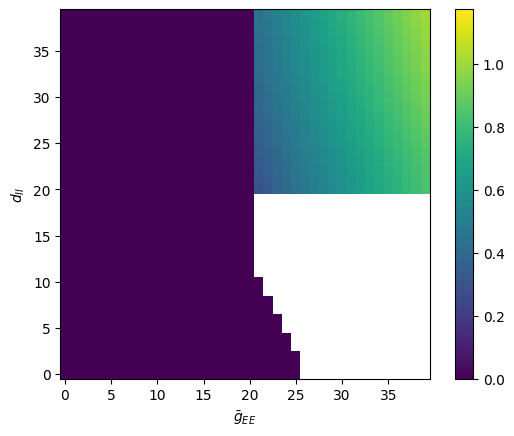

In [43]:
plt.imshow(freq_diagram, origin='lower')
plt.colorbar()
norm = mcolors.Normalize(vmin=0, vmax=1)
plt.imshow(phase_diagram, cmap='gray', norm=norm, origin='lower')

plt.ylabel(r'$d_{II}$')
plt.xlabel(r'$\bar{g}_{EE}$')

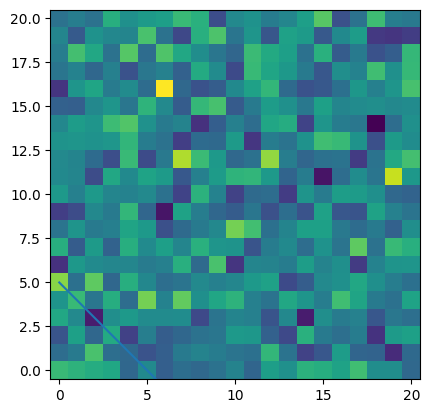

In [11]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0,20,100)
y = 5 - x
plt.plot(x, y)
plt.imshow(np.random.randn(21,21), origin='lower')


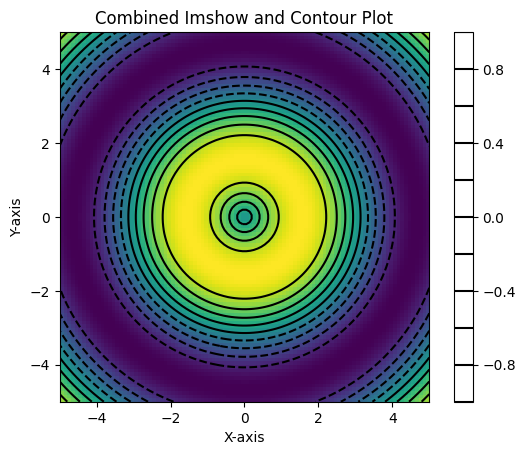

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# 创建数据
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# 使用imshow绘制图像
plt.imshow(Z, extent=[-5, 5, -5, 5], origin='lower', cmap='viridis')

# 使用contour绘制等高线
contour = plt.contour(X, Y, Z, levels=10, colors='black')

# 添加标题和标签
plt.title('Combined Imshow and Contour Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# 显示图形
plt.colorbar()  # 可选，为imshow添加颜色条
plt.show()
